In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
imgName = 'town.jpg'
img = cv.imread(imgName)

(np.float64(-0.5), np.float64(1079.5), np.float64(1321.5), np.float64(-0.5))

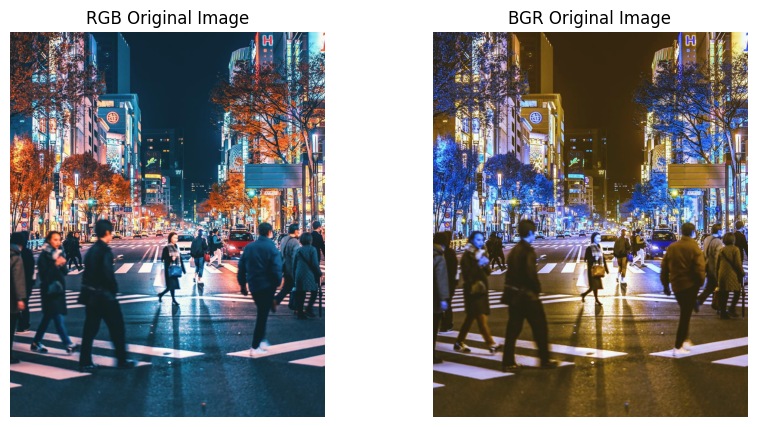

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].set_title("RGB Original Image")
ax[0].axis("off")

ax[1].imshow(img)
ax[1].set_title("BGR Original Image")
ax[1].axis("off")

In [7]:
print("Size of the image: ", img.shape)

Size of the image:  (1322, 1080, 3)


## Spatial Filtering with different kernal sizes

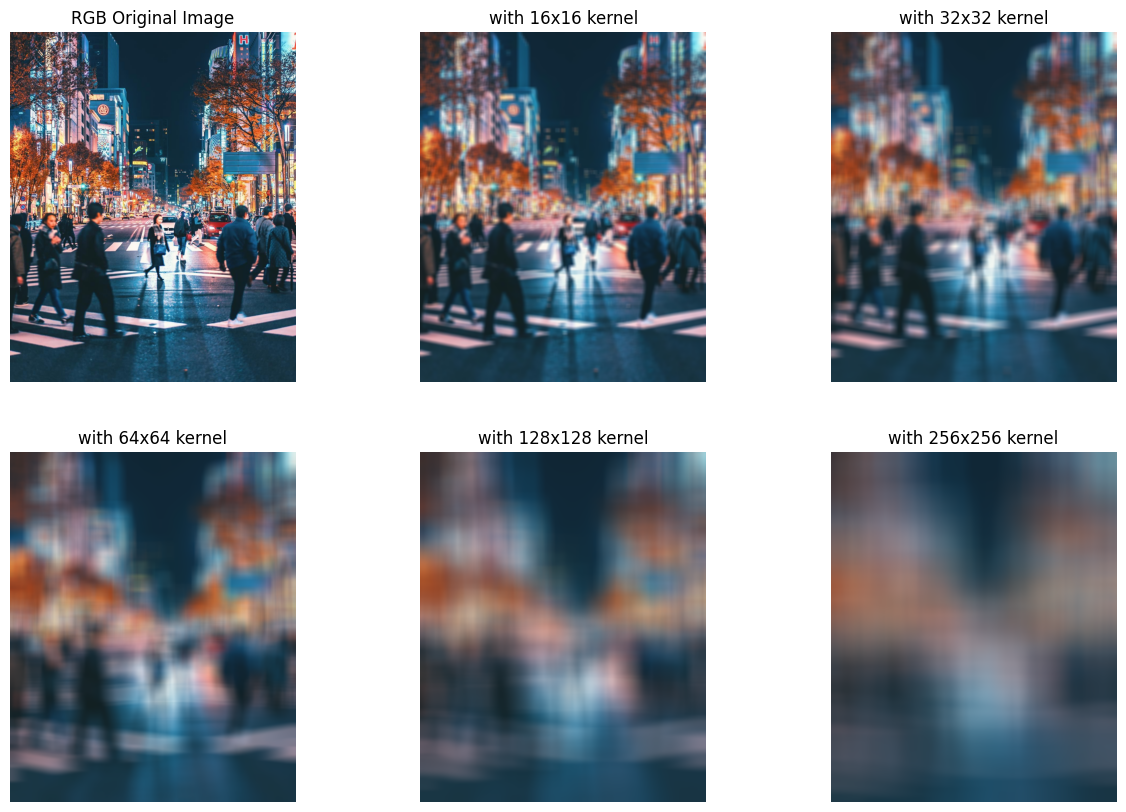

In [8]:
# Plot both original and blurred images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,0].set_title("RGB Original Image")
ax[0,0].axis("off")

kernel = np.ones((16,16), np.float32) / (16 * 16)
img_blur = cv.filter2D(img, -1, kernel)

ax[0,1].imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))
ax[0,1].set_title("with 16x16 kernel")
ax[0,1].axis("off")

kernel = np.ones((32,32), np.float32) / (32 * 32)
img_blur = cv.filter2D(img, -1, kernel)

ax[0,2].imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))
ax[0,2].set_title("with 32x32 kernel")
ax[0,2].axis("off")

kernel = np.ones((64,64), np.float32) / (64 * 64)
img_blur = cv.filter2D(img, -1, kernel)

ax[1,0].imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))
ax[1,0].set_title("with 64x64 kernel")
ax[1,0].axis("off")

kernel = np.ones((128,128), np.float32) / (128 * 128)
img_blur = cv.filter2D(img, -1, kernel)

ax[1,1].imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))
ax[1,1].set_title("with 128x128 kernel")
ax[1,1].axis("off")

kernel = np.ones((256,256), np.float32) / (256 * 256)
img_blur = cv.filter2D(img, -1, kernel)

ax[1,2].imshow(cv.cvtColor(img_blur, cv.COLOR_BGR2RGB))
ax[1,2].set_title("with 256x256 kernel")
ax[1,2].axis("off")

plt.show()


(np.float64(-0.5), np.float64(563.5), np.float64(845.5), np.float64(-0.5))

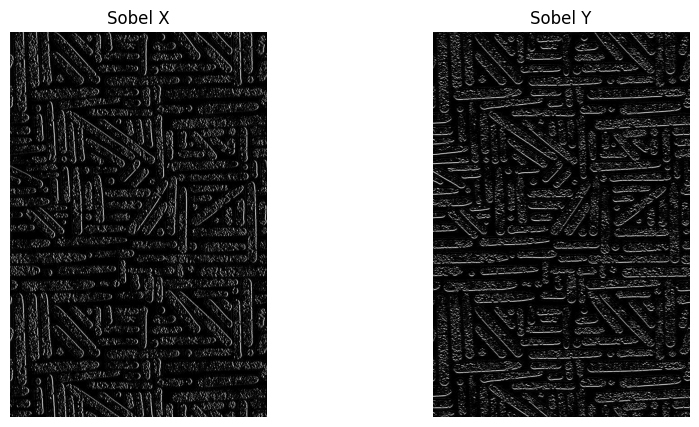

In [9]:
imgName = 'pattern.jpg'
img = cv.imread(imgName, cv.IMREAD_GRAYSCALE)
fig, ax= plt.subplots(1,2, figsize=(10,5))

sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2], 
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0], 
                    [-1, -2, -1]])
img_sobel_x = cv.filter2D(img, -1, sobel_x)
img_sobel_y = cv.filter2D(img, -1, sobel_y)

ax[0].imshow(img_sobel_x, cmap='gray')
ax[0].set_title("Sobel X")  
ax[0].axis("off")

ax[1].imshow(img_sobel_y, cmap='gray')
ax[1].set_title("Sobel Y")
ax[1].axis("off")

(np.float64(-0.5), np.float64(563.5), np.float64(845.5), np.float64(-0.5))

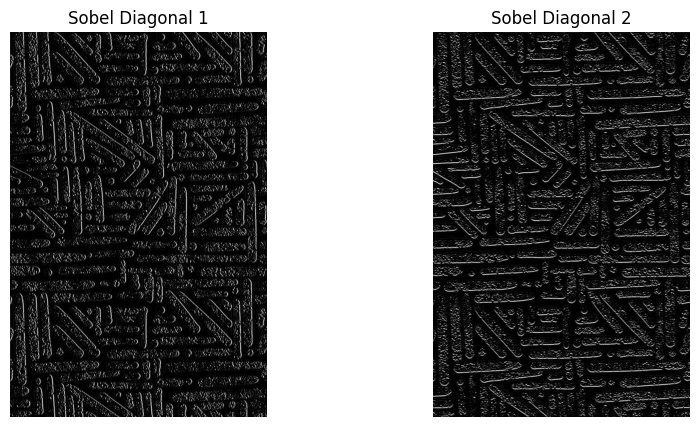

In [10]:
fig, ax= plt.subplots(1,2, figsize=(10,5))

sobel_diagonal1 = np.array([[2, 1, 0],
                    [1, 0, -1], 
                    [0, -1, -2]])
sobel_diagonal2= np.array([[0, 1, 2],
                    [-1, 0, 1], 
                    [-2, -1, 0]])
img_sobel_x = cv.filter2D(img, -1, sobel_x)
img_sobel_y = cv.filter2D(img, -1, sobel_y)

ax[0].imshow(cv.cvtColor(img_sobel_x, cv.COLOR_BGR2RGB))
ax[0].set_title("Sobel Diagonal 1")  
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img_sobel_y, cv.COLOR_BGR2RGB))
ax[1].set_title("Sobel Diagonal 2")
ax[1].axis("off")

(np.float64(-0.5), np.float64(563.5), np.float64(845.5), np.float64(-0.5))

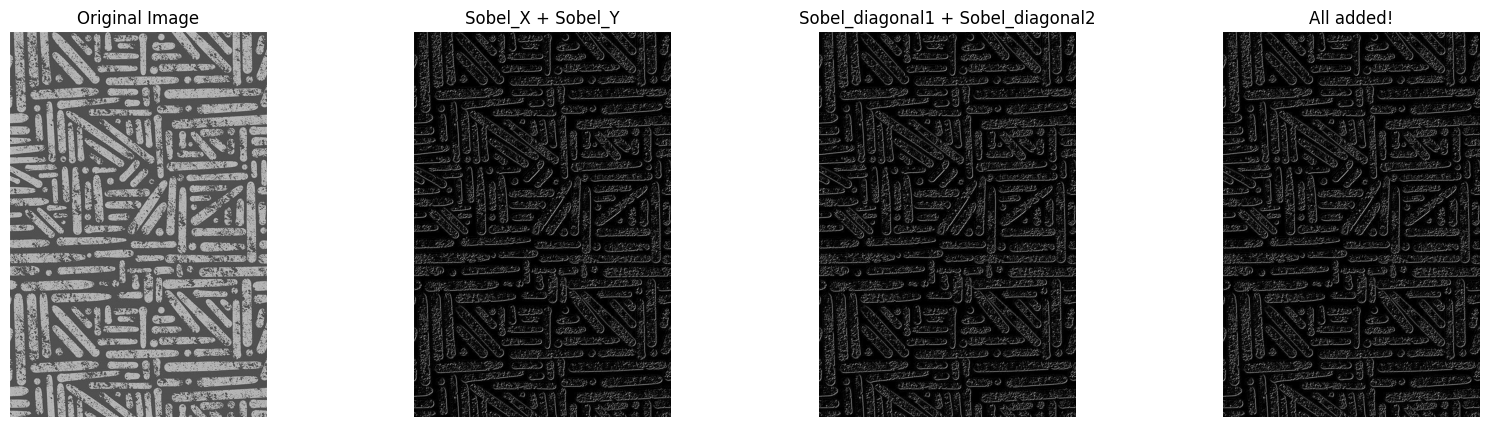

In [24]:
sobel_added_handV=cv.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)
sobel_added_diagonal = cv.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

finaladded= cv.addWeighted(sobel_added_handV, 0.5, sobel_added_diagonal, 0.5, 0)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(sobel_added_handV, cmap='gray')
ax[1].set_title("Sobel_X + Sobel_Y")
ax[1].axis("off")

ax[2].imshow(sobel_added_diagonal, cmap='gray')
ax[2].set_title("Sobel_diagonal1 + Sobel_diagonal2")
ax[2].axis("off")

ax[3].imshow(finaladded, cmap='gray')
ax[3].set_title("All added!")
ax[3].axis("off")

(np.float64(-0.5), np.float64(563.5), np.float64(845.5), np.float64(-0.5))

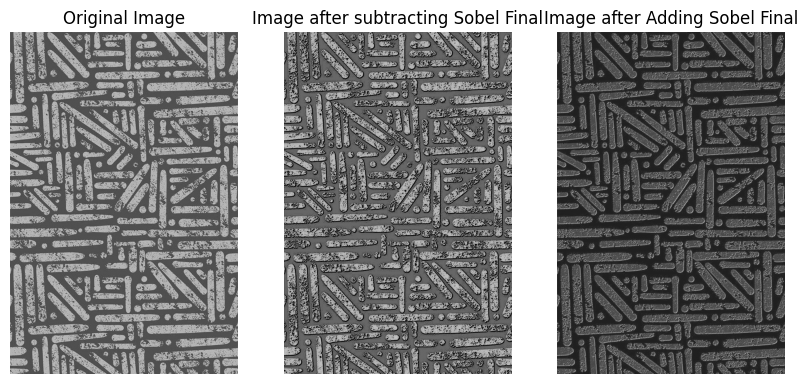

In [29]:
fliped = cv.subtract(img, finaladded)
added= cv.addWeighted(img, 0.5,finaladded,0.5,0)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(fliped, cmap='gray')
ax[1].set_title("Image after subtracting Sobel Final")
ax[1].axis("off")

ax[2].imshow(added, cmap='gray')
ax[2].set_title("Image after Adding Sobel Final")
ax[2].axis("off")